# **Import Libraries and modules**

### Install Keras module for python and import it to run basic keras functions for model building.

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Numpy library which is usually used to store data. Also import other support libraries in keras for model building and predefined dataset loading.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
test_features = X_test[:]

11493376/11490434 [==============================] - 0s 0us/step


### Matplotlib is a visualization tool of python which can be used to plot graphs and display images. Here we first print the total number of images used for training. Then import matplotlib library and show the first training image.

(60000, 28, 28)


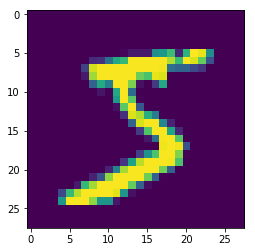

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### As the dataset contains single channel images, we reshape array to correct the input channel dimension.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalize values between 0 to 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Show labels of last 10 train data

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Show the matrix converted labels of last 10 images

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 4th Code of Assignment 4



In [10]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D, Dropout
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

W0825 14:37:57.423245 140155544749952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0825 14:37:57.472565 140155544749952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 14:37:57.480205 140155544749952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 14:37:57.520790 140155544749952 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 8)         728       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


###Modifications Added to above network
*   ReLU(activation) after BN



In [11]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D, Dropout
from keras import regularizers
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3))#10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))#8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3))#6
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


###Custom loss for L2 regularization

In [0]:
import keras.backend as K
def reg_term(val):
  w2 = 0
  for i in range(len(model.layers)):
    if len(model.layers[i].get_weights()) > 0:
      t = np.sum(model.layers[i].get_weights()[0]*model.layers[i].get_weights()[0])
      w2 += t
  w2 *= val/(2*X_train.shape[0])
  return w2

def l2_loss(y_true, y_pred):
  return K.categorical_crossentropy(y_true, y_pred) + reg_term(val)

#### Modifications to model hyperparameters

*  Addition of ImageDataGenerator to perform Image Normalization
*  Addition of logic to save best model based on max val. accuracy
*  Addition of L2 regularization of loss





In [13]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

val = 0.01

model.compile(loss=l2_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_iterator = datagen.flow(X_train, Y_train, batch_size=128)

model_saved = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_acc', mode='max')

model_info = model.fit_generator(train_iterator, samples_per_epoch = 60000, nb_epoch = 40, 
                                 validation_data = (X_test, Y_test), 
                                 callbacks=[model_saved, LearningRateScheduler(scheduler, verbose=1)])

W0825 14:38:01.933352 140155544749952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=40)`
W0825 14:38:02.477145 140155544749952 deprecatio

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 9s 20ms/step - loss: 0.1706 - acc: 0.9474 - val_loss: 0.1122 - val_acc: 0.9639
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 5s 11ms/step - loss: 0.0553 - acc: 0.9825 - val_loss: 0.0370 - val_acc: 0.9878
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 5s 11ms/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0312 - val_acc: 0.9893
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 5s 11ms/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.0358 - val_acc: 0.9893
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
468/468 [==============================] - 5s 11ms/step - loss: 0.0298 - acc: 0.9901 - val_loss: 0.0

### Calculate the validation score

In [14]:
model.load_weights(filepath = 'best_model.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.023235189401684328, 0.9934]


### Predict the label for the test images

In [15]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[1.51594571e-13 1.90800587e-12 8.51555104e-10 6.18100549e-09
  2.66180210e-16 6.17723320e-13 4.79906979e-19 1.00000000e+00
  2.95975470e-14 1.03783586e-08]
 [1.15599075e-09 2.61954319e-10 1.00000000e+00 6.32299524e-14
  1.49885611e-13 8.44329192e-17 1.12160212e-10 3.87346473e-14
  8.36184149e-14 1.16104866e-13]
 [4.37347381e-10 9.99997735e-01 4.03747391e-09 9.07393397e-11
  7.59818661e-08 5.21489625e-08 1.40990900e-10 2.19478397e-06
  2.27349961e-09 3.24286348e-10]
 [9.99991536e-01 2.63935466e-15 3.33460620e-11 5.73939203e-12
  4.35982708e-11 6.89815360e-09 8.40037046e-06 1.13594233e-13
  3.10191817e-10 7.93126453e-09]
 [9.14049218e-13 6.56251149e-13 4.89925754e-13 4.96272186e-13
  9.99902606e-01 3.87079518e-12 1.87146743e-10 8.93151113e-13
  2.02810018e-08 9.73605711e-05]
 [3.43378237e-09 9.99993920e-01 8.77479511e-09 2.27477152e-12
  6.72517686e-08 4.24808055e-09 1.40241291e-10 5.99607847e-06
  2.99742697e-09 4.90740948e-10]
 [2.41627070e-21 2.27208703e-12 7.69725776e-12 9.08493658e

### Saving layer names in a dict datatype so that we can later use it for visualization.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

###Visualize 25 of the wrong detections

(10000, 28, 28)


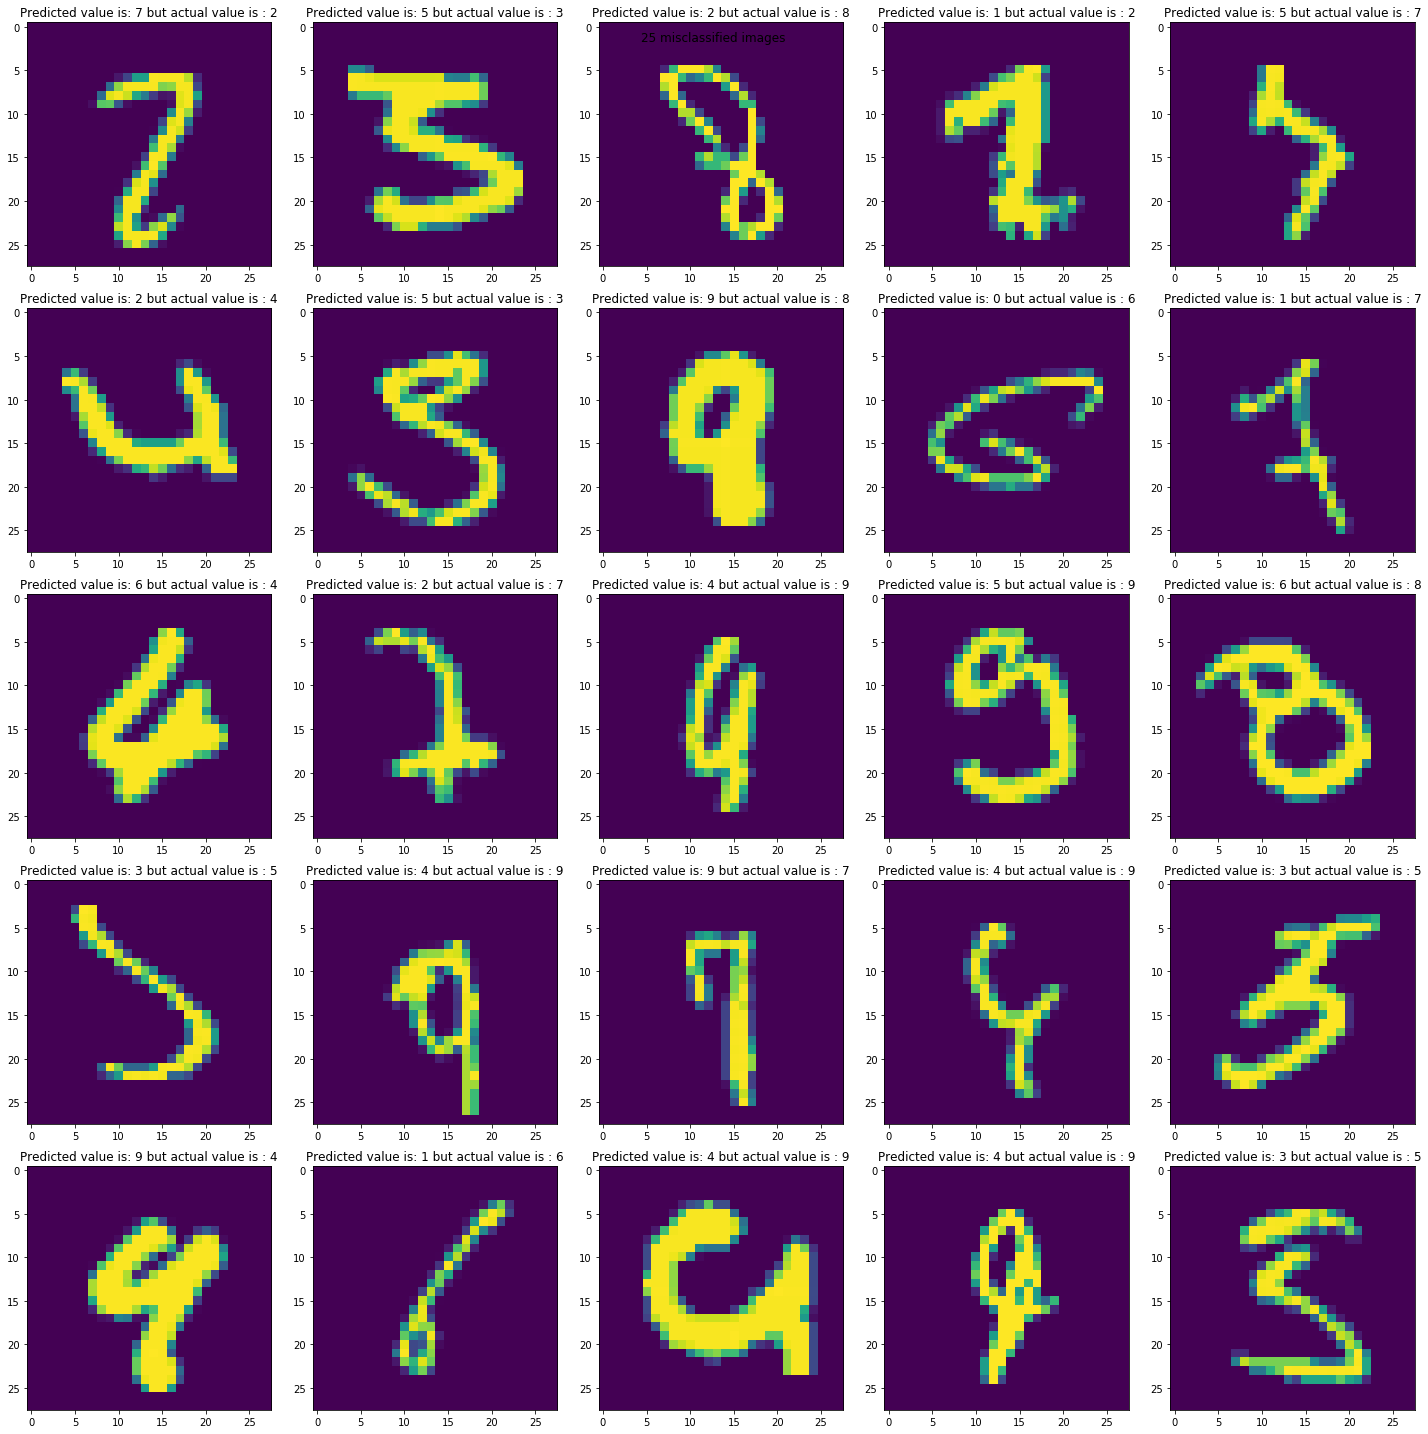

In [18]:
y_pred = model.predict(X_test)
result=[0]*10000
#from a subplot of 5X5 images with each figure of 20X20
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
fig.tight_layout()
#give title to sub plot
fig.suptitle('25 misclassified images')
#find the predicted value and store it in a list
for i in range(10000):
  for j in range(10):
    if(np.round_(y_pred[i][j])-1 == 0):
      result[i]=j
      
print (test_features.shape)     
layer_output= []
count,i = 0,0
x,y=0,0
#iterate over all 10000 images until 25 images are printed
while (i < 10000 and count<25):
  #if the prediction is not equal to actual
  if(y_test[i]-result[i] !=0):
    #show the image
    ax[x,y].imshow(test_features[i])
    ax[x,y].set_title('Predicted value is: %d but actual value is : %d' %(result[i],y_test[i]))
    if(y >= 4):
      y=0
      x+=1
    else:
      y+=1      
    count=count+1
  i+=1